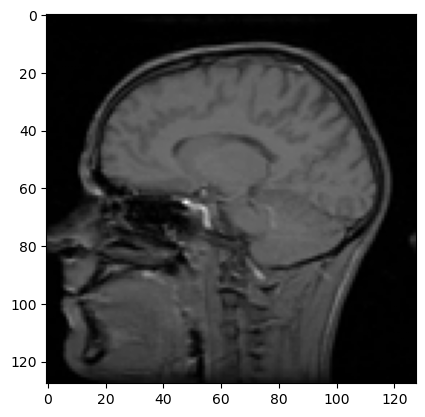

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
with open('IMGS/head.128', 'rb') as binary_file:
    data = binary_file.read()
    

data = np.frombuffer(data, dtype=np.uint8)
# The next line tells us how to organise it
x = np.reshape(data,(128,128))
plt.imshow(x, cmap='gray')
plt.show()

In [2]:
# compute 2D DFT
X = np.fft.fft2((x))
print(X)

[[ 701110.            +0.j         -220145.81568102 +9500.90749702j
   -85635.7086269 -44189.8084883j  ...  -11835.4923559 +32429.73897161j
   -85635.7086269 +44189.8084883j  -220145.81568102 -9500.90749702j]
 [-163646.46397938-17222.85142685j   43427.32362593 -2096.41727578j
    54318.21397526 -4275.92269881j ...    5727.68781098 -7345.78849432j
   -10632.4053647  +4597.95771761j   16707.89094831+84938.39157053j]
 [ -80539.74908222+76722.43634794j   69751.71903966+21250.68594308j
    15876.17372923-28921.68224854j ...   -6295.51871151-10298.61662377j
    28700.77602547-40716.77760504j    2173.50873157-41488.27557545j]
 ...
 [ -21784.57589082-17484.21415673j   28743.91370857 +2077.91069369j
   -23432.46784542 -9236.85309588j ...   -2493.54657211 -8707.97857751j
     3945.98839741  -534.68511875j   14272.06362852+19254.25036956j]
 [ -80539.74908222-76722.43634794j    2173.50873157+41488.27557545j
    28700.77602547+40716.77760504j ...  -21910.19121334 +4901.52122829j
    15876.17372923+

I will try to display discrete Fourier space is through displaying the magnitude and phase images separately. But because only a small proportion of transform space actually has meaningful magnitudes, displaying phase on its own is not very useful.

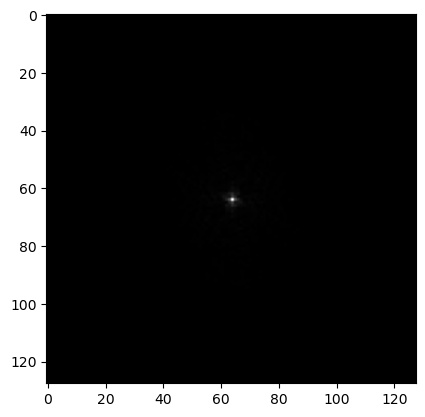

In [4]:
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.imshow(np.abs(X), cmap='gray')
plt.imshow(np.fft.fftshift(np.abs(X)), cmap='gray')
plt.show()

Lets try the Inverse transform

In [5]:
xdash = np.fft.ifft2(X)
print('Imag max:', np.max(np.abs(xdash.imag)))
print('Real max:', np.max(np.abs(xdash.real)))

Imag max: 3.238483204183443e-14
Real max: 224.0


from this we can see that we can safely ignore the imaginary part.

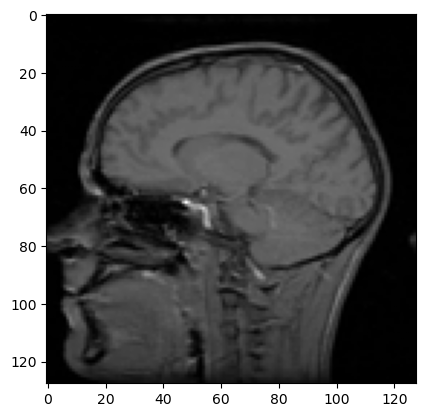

In [7]:
plt.imshow(xdash.real, cmap='gray')
plt.show()

lets see the differences between ori and reconstructed

In [8]:
MSE = np.mean((xdash - x)**2)
print(MSE)

(2.4238819529432015e-29-4.1450299012110094e-30j)


calculating the energy compaction property, by retaining only a portion of the coefficients in the discrete fourier space, assuming the rest is negligible.

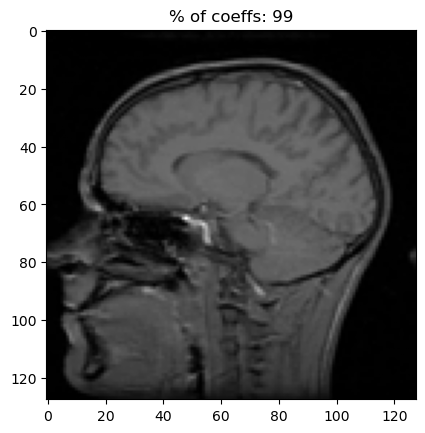

In [9]:
%matplotlib inline
from IPython.display import clear_output
X = np.fft.fft2(x)
Xabs = np.abs(X)
ind = np.argsort(Xabs, axis=None)
reverseind = ind[::-1]

M,N = np.shape(X)
Ydash = np.zeros((M,N),dtype=complex)

NCoefficients = len(reverseind)

# Create some empty list to hold
# results as we iterate
rmse_L = []
percent_coeffs_L = []

for i in range(1,NCoefficients,100):
    YdashUnravelled = Ydash.flatten()
    YdashUnravelled[reverseind[0:i]]=X.flatten()[reverseind[0:i]]
    Ydash=np.reshape(YdashUnravelled,(M,N))
    ydash=np.fft.ifft2(Ydash).real
    
    percent_coeffs=round(100*float(i)/(M*N))
    thisRMSE = np.sqrt(np.mean((ydash - x)**2))
    rmse_L.append(thisRMSE)
    percent_coeffs_L.append(percent_coeffs)
    
    plt.imshow(ydash.real, cmap='gray')
    textstr = '% of coeffs: '+str(percent_coeffs) 
    plt.title(textstr)
    plt.show()
    clear_output(wait=True)
    